In [2]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from nn_interpretability.interpretation.saliency_map.saliency_map import SaliencyMap
from nn_interpretability.model.model_trainer import ModelTrainer
from nn_interpretability.model.model_repository import ModelRepository
from nn_interpretability.visualization.mnist_visualizer import MnistVisualizer
from nn_interpretability.dataset.mnist_data_loader import MnistDataLoader

In [3]:
model_name = 'model_am.pt'

train = False

In [4]:
mnist_data_loader = MnistDataLoader()

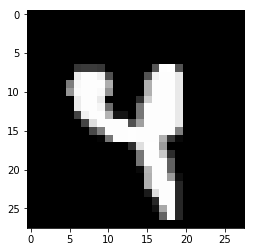

In [5]:
MnistVisualizer.show_dataset_examples(mnist_data_loader.trainloader)

In [6]:
model = ModelRepository.get_am_classifier(model_name)

if train:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    model.train()
    ModelTrainer.train(model, criterion, optimizer, trainloader)
    
    ModelRepository.save(model, model_name)

# I. Saliency Maps

## 1. Saliency Maps for each class

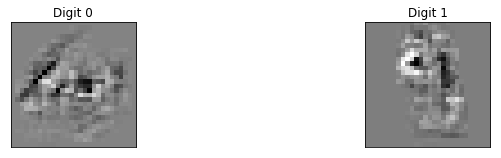

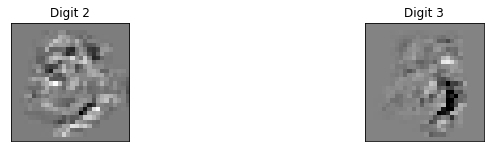

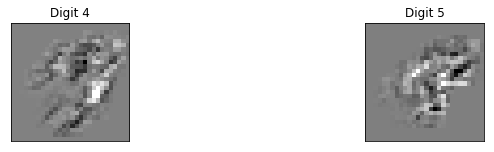

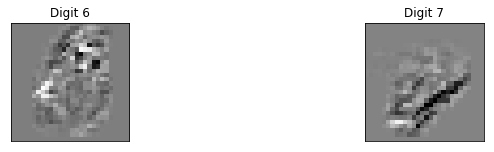

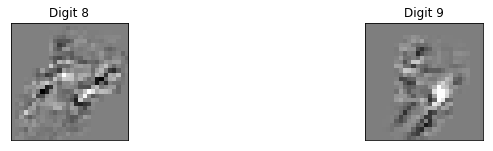

In [9]:
images = []
img_shape = (28, 28)

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    
    interpretor = SaliencyMap(model, [], img_shape, None)
    endpoint = interpretor.interpret(img)
    endpoint = MnistVisualizer.normalize(endpoint)

    images.append(endpoint.reshape(img_shape))

MnistVisualizer.display_images_for_each_class(images)

## 2. Saliency map for each class multiplied by the input

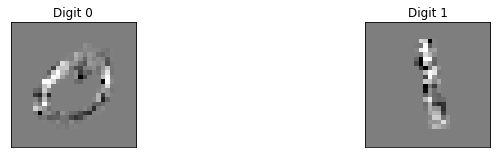

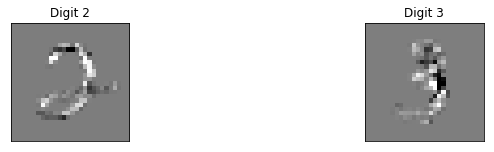

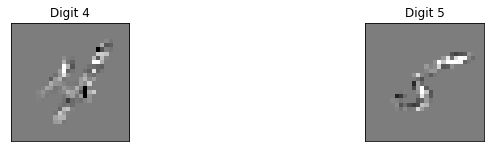

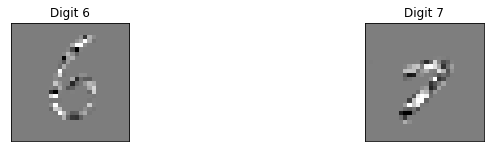

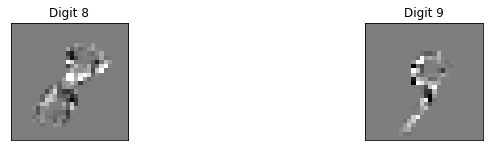

In [10]:
images = []
img_shape = (28, 28)

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    
    interpretor = SaliencyMap(model, [], img_shape, None, True)
    endpoint = interpretor.interpret(img)
    endpoint = MnistVisualizer.normalize(endpoint)
   
    images.append(endpoint.detach().numpy().reshape(img_shape))

MnistVisualizer.display_images_for_each_class(images)